


---


**COMM055 COURSEWORK - A COMPARISON STUDY ON MACHINE LEARNING ALGORITHMS**




---


# **MODEL DEVELOPMENT, EVALUATION AND COMPARISONS ON UNSUPERVISED MACHINE LEARNING ALGORITHMS - CLUSTERING**


---


This notebook focuses on the comparison study on **Unsupervised ML Algorithms** and various Data Mining techniques.

**On Datasets:** IBM Attrition, Mushroom Classification

**Problem Type:** Clustering

**ML Algorithms:** K-Means, Birch, Agglomerative Clustering, K-Modes

**Performance Metrics:** Adjusted Rand Index, Homogeneity, Completeness, V Measure

---


**Contents:**

1. Data Pre-processing

   **Before Parameter Tuning**
2. Default Modelling on "IBM" and "Mushroom"
3. Evaluation and Comparison of the default models

   **After Parameter Tuning**
4. Parameter Optimization (Manual Tuning) on developed models
5. Evaluation and Comparison of the optimized models after Manual Tuning
6. PCA - Dimensionality Reduction
7. Evaluation and Comparison of the optimized models after PCA

  **Conclusion**
8. Proposing the best and worst performing Clustering Algorithms on "IBM Attrition" and "Mushroom Classification" Datasets



---



# **1. Data Pre-processing**


## **1.1 On IBM Attrition**


---

Encoding Categorical Variables

---


In [ ]:
# Importing the cleaned dataset downloaded from the Data Preparation and Understanding.ipynb file
# Before running this code, please upload the dataset. 
# To upload the dataset go to Files(the folder icon to the left)> Upload> choose "ibmData.csv" dataset from your local drive
# Importing pandas library
# Importing preprocessing from sklearn to preprocess the dataset
# Reading the CSV file using pandas.read_csv function and storing in ibmData variable

import pandas as pd
from sklearn import preprocessing
ibmData = pd.read_csv('/content/ibmData.csv')

In [ ]:
# Putting all the input variables in one dataframe(IbmX) and the output variable in another(Ibmy)

IbmX = ibmData.drop('Attrition', axis=1)
Ibmy = ibmData['Attrition']

print(IbmX)
print(Ibmy)


      Age     BusinessTravel  ...  YearsSinceLastPromotion YearsWithCurrManager
0      41      Travel_Rarely  ...                        0                    5
1      49  Travel_Frequently  ...                        1                    7
2      37      Travel_Rarely  ...                        0                    0
3      33  Travel_Frequently  ...                        3                    0
4      27      Travel_Rarely  ...                        2                    2
...   ...                ...  ...                      ...                  ...
1465   36  Travel_Frequently  ...                        0                    3
1466   39      Travel_Rarely  ...                        1                    7
1467   27      Travel_Rarely  ...                        0                    3
1468   49  Travel_Frequently  ...                        0                    8
1469   34      Travel_Rarely  ...                        1                    2

[1470 rows x 29 columns]
0       Yes
1 

**Comments:** The dataframe has been divided into:

IbmX - with all the input variables/columns

Ibmy - with the Ground Truth (need later for comparing ground truth with the predicted labels)

In [ ]:
# Importing LabelEncoder from sklearn.preprocessing to encode the categorical labels to "1" and "0"
# The target variable 'Attrition' has categorical values 'Yes' and 'No', converting these to '1' and '0'
#Importing numpy library to check for the unique values in the Target Column
from sklearn.preprocessing import LabelEncoder
import numpy as np

print("Before Label Encoding: \n", Ibmy.head())
Ibmy_le = LabelEncoder()
# Yes -> 1 and No -> 0
Ibmy = Ibmy_le.fit_transform(Ibmy.values)
print(100*'-')
print("After Label Encoding: \n", Ibmy)
print('No and Yes are labelled as:', np.unique(Ibmy))

Before Label Encoding: 
 0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object
----------------------------------------------------------------------------------------------------
After Label Encoding: 
 [1 0 1 ... 0 0 0]
No and Yes are labelled as: [0 1]


**Comments:** Shows that the classes "Yes" and "No" are labelled as 1 and 0

In [ ]:
# Get the dummy variables for the categorical feature
# Add the results to the original dataframe
# Drop the original categorical variables as dummies are already created

import numpy as np

ibm_category = IbmX.select_dtypes(exclude = [np.number])
ibm_category = ibm_category.columns.values

ibmDummies = pd.get_dummies(IbmX[ibm_category])

IbmX_onehot = pd.concat([IbmX, ibmDummies], axis = 1)
IbmX_onehot.drop(ibm_category, axis = 1, inplace = True)
IbmX_onehot.head(5)
IbmX = IbmX_onehot
IbmX

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,49,279,8,1,3,61,2,2,2,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,37,1373,2,2,4,92,2,1,3,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,4,56,3,1,3,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,27,591,2,1,1,40,3,1,2,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,12290,4,17,3,3,1,17,3,3,5,2,0,3,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0
1466,39,613,6,1,4,42,2,3,1,21457,4,15,3,1,1,9,5,3,7,7,1,7,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0
1467,27,155,4,3,2,87,4,2,2,5174,1,20,4,2,1,6,0,3,6,2,0,3,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
1468,49,1023,2,3,4,63,2,2,2,13243,2,14,3,4,0,17,3,2,9,6,0,8,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0


**Comments:** After one hot encoding, the number of columns changed from 28 to 50, as the n values in one categorical column are converted to n columns. (i.e If one categorical column has three values then it gets converted to three columns with binary values 0 and 1)

In [ ]:
# Few columns can be removed (the highly correlated ones) to reduce the dimensions
# Referring the  Classification.ipynb file (extra section), columns 'TotalWorkingYears', 'YearsAtCompany', 'PercentSalaryHike', 'YearsInCurrentRole' are dropped 

ibmX = ibmData.drop(['TotalWorkingYears', 'YearsAtCompany', 'PercentSalaryHike', 'YearsInCurrentRole'], axis=1)


## **1.2 On Mushroom**

---


Encoding Categorical Features


---

In [ ]:
# Importing the cleaned dataset downloaded from the DPU.ipynb file
# Before running this code, please upload the dataset. 
# To upload the dataset go to Files(the folder icon to the left)> Upload> choose "mushroomData.csv" dataset from your local drive
# Importing pandas library
# Importing preprocessing from sklearn to preprocess the dataset
# Reading the CSV file using pandas.read_csv function and storing in mushroomData variable

import pandas as pd
from sklearn import preprocessing
mushroomData = pd.read_csv('/content/mushroomData.csv')

In [ ]:
# Putting all the input variables in one dataframe(mushroomX) and the output variable in another(mushroomy)

mushroomX = mushroomData.drop('class', axis=1)
mushroomy = mushroomData['class']

print(mushroomX)
print(mushroomy)


     cap-shape cap-surface cap-color  ... spore-print-color population habitat
0            x           s         n  ...                 k          s       u
1            x           s         y  ...                 n          n       g
2            b           s         w  ...                 n          n       m
3            x           y         w  ...                 k          s       u
4            x           s         g  ...                 n          a       g
...        ...         ...       ...  ...               ...        ...     ...
8119         k           s         n  ...                 b          c       l
8120         x           s         n  ...                 b          v       l
8121         f           s         n  ...                 b          c       l
8122         k           y         n  ...                 w          v       l
8123         x           s         n  ...                 o          c       l

[8124 rows x 20 columns]
0       p
1       e
2     

**Comments:** The dataframe has been divided into:

mushroomX - with all the input variables/columns

mushroomy - with the target variable

In [ ]:
# Importing LabelEncoder from sklearn.preprocessing to encode the categorical labels to "1" and "0"
# The target variable 'class' has categorical values 'p' and 'e', converting these to '1' and '0'
# Importing numpy library to check for the unique values in the Target Column
from sklearn.preprocessing import LabelEncoder
import numpy as np

print("Before Label Encoding: \n", mushroomy.head())
mushroomy_le = LabelEncoder()
# p -> 1 and e -> 0
mushroomy = mushroomy_le.fit_transform(mushroomy.values)
print(100*'-')
print("After Label Encoding: \n", mushroomy)
print("Edible('e') and Poisonous('p')  are labelled as:", np.unique(mushroomy))

Before Label Encoding: 
 0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object
----------------------------------------------------------------------------------------------------
After Label Encoding: 
 [1 0 0 ... 0 1 0]
Edible('e') and Poisonous('p')  are labelled as: [0 1]


**Comments:** Shows that the classes "e" and "p" are labelled as 0 and 1

In [ ]:
# LableEncoding categorical values in the dataset
# Importing OneHotEncoder from sklearn.preprocessing library to convert n categorical values to n binary values
# from sklearn.preprocessing import OneHotEncoder
# mushroomX_onehot = OneHotEncoder().fit_transform(mushroomX)
# print('Feature matrix size:',mushroomX.shape)

mushroomX_le = LabelEncoder()
for col in mushroomX.columns:
    mushroomX[col] = mushroomX_le.fit_transform(mushroomX[col])
 
mushroomX.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,2,2,7,7,2,1,0,3,0,1


**Comments:** After one hot encoding, the number of columns increased from 20 to 111, as the n values in one categorical column are converted to n columns. (i.e If one categorical column has three values then it gets converted to three columns with binary values 0 and 1)

**Action and Justification:** It was decided to go along with label encoding rather than one hot for two main reason:

1. The computational time for 20 columns vs 111 columns would be considerably low thereby increasing the efficiency of the ML models

2. Clustering performs better with low-dimensional data




# **2. Functions for Fitting Models and Performance Metrics**

## 2.1 Modelling

In [ ]:
# Importing the neccessary libraries
# Though some of these libraries are not used until the models are built in section 3 - its imported as few of these are needed inside the functions that are written in this section
# Importing libraries for K-Means, DBSCAN, Agglomerative Clustering, StandardScaler
# Importing metrics for getting the performance metrics
# GridSearchCV and RandomizedSearchCV to help with parameter tuning
!pip install kmodes
from kmodes.kmodes import KModes
from sklearn.cluster import KMeans, Birch, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score, homogeneity_score, completeness_score, v_measure_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# A function for fitting the three clustering algorithm models

# Standardizing the data

scaler = StandardScaler()
IbmX_scaled = scaler.fit_transform(IbmX)
mushroomX_scaled = scaler.fit_transform(mushroomX)

def models(X):
  clf1 = kmeans.fit(X)
  clf2 = birch.fit(X)
  clf3 = kmodes.fit(X)
  clf4 = hac.fit(X)

  return clf1, clf2, clf3, clf4

## 2.2 Performance Metrics

---
Adjusted Rand Index

Homogeneity

Completeness

V Measure

---

In [ ]:
def metrics(X, y, data):
  clf1, clf2, clf3, clf4 = models(X)
  model = []
  model.append(('K-Means', clf1))
  model.append(('Birch', clf2))
  model.append(('K-Modes', clf3))
  model.append(('HAC', clf4))
  print(50*'-')
  print("\tPerformance Metrics on %s data" % (str(data)) )
  print(50*'-')
  for name, i in model:
    labels_pred = i.labels_
    labels_true = y
    ari = adjusted_rand_score(labels_true, labels_pred)
    homogeneity = homogeneity_score(labels_true, labels_pred)
    completeness = completeness_score(labels_true, labels_pred)
    vmeasure = v_measure_score(labels_true, labels_pred)
    print("%s algorithm \n" % (name))
    print("Adjusted Rand Index Score: %.5f" % (ari))
    print("Homogeneity Score: %.5f" % (homogeneity))
    print("Completeness Score: %.5f" % (completeness))
    print("V Measure Score: %.5f" % (vmeasure))
    print(50*'-')

# **3. Evaluation and Comparison of the default models** 

**Modelling Clustering Algorithms with default Parameter values**

---
K-Means
    
Birch Clustering

K- Modes

Hierarchical Agglomerative Clustering
 
---



In [ ]:
# To hide all the warnings for a neat presentation
import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once') # uncomment to display the warnings once adn not repeatedly and comment the line just above

# Calling the models - These models are fitted through the written function models() which are called under Performance metrics function (metrics())

kmeans = KMeans()
birch = Birch()
kmodes = KModes()
hac = AgglomerativeClustering()

In [ ]:
# Performance Metrics - called using the written function metrics()

metrics(IbmX_scaled, Ibmy, "IBM")
print()
metrics(mushroomX_scaled, mushroomy, "Mushroom")


--------------------------------------------------
	Performance Metrics on IBM data
--------------------------------------------------
K-Means algorithm 

Adjusted Rand Index Score: 0.00555
Homogeneity Score: 0.06661
Completeness Score: 0.01546
V Measure Score: 0.02510
--------------------------------------------------
Birch algorithm 

Adjusted Rand Index Score: 0.04791
Homogeneity Score: 0.01131
Completeness Score: 0.00677
V Measure Score: 0.00847
--------------------------------------------------
K-Modes algorithm 

Adjusted Rand Index Score: -0.00052
Homogeneity Score: 0.05171
Completeness Score: 0.01150
V Measure Score: 0.01881
--------------------------------------------------
HAC algorithm 

Adjusted Rand Index Score: 0.04302
Homogeneity Score: 0.01128
Completeness Score: 0.00804
V Measure Score: 0.00939
--------------------------------------------------

--------------------------------------------------
	Performance Metrics on Mushroom data
------------------------------------

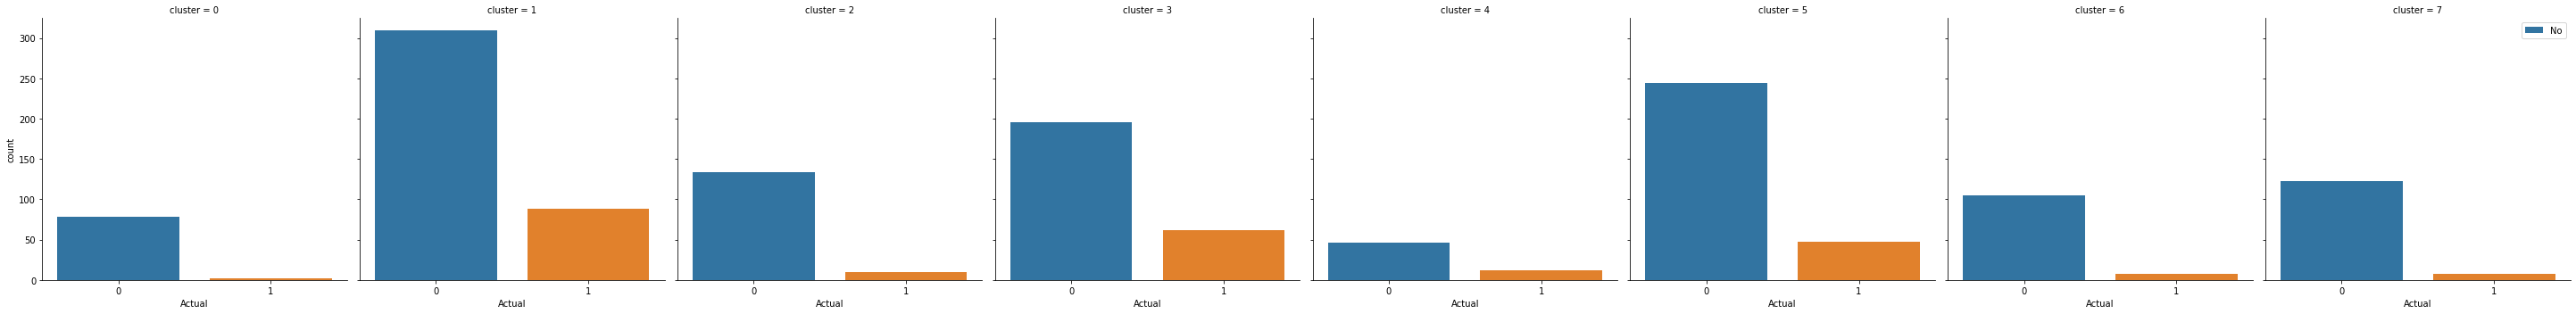

In [ ]:
# Plotting to see how the default K-means model has clustered the classes of Ibm
# Reference: https://medium.com/@brijpatel1823/mushroom-classification-logistic-regression-vs-k-mean-clustering-5d9f75afa209

kmean_pred = KMeans()
kmean_pred.fit(IbmX_scaled)
clusters = kmean_pred.predict(IbmX_scaled)
cluster_result = pd.DataFrame()
cluster_result['cluster'] = clusters
cluster_result['Actual'] = Ibmy
sns.factorplot(col='cluster', x='Actual', data=cluster_result, kind='count')
plt.legend(labels=['No'])
plt.show()

**Comments:** There is not one cluster that is more homogenous with almost only one class

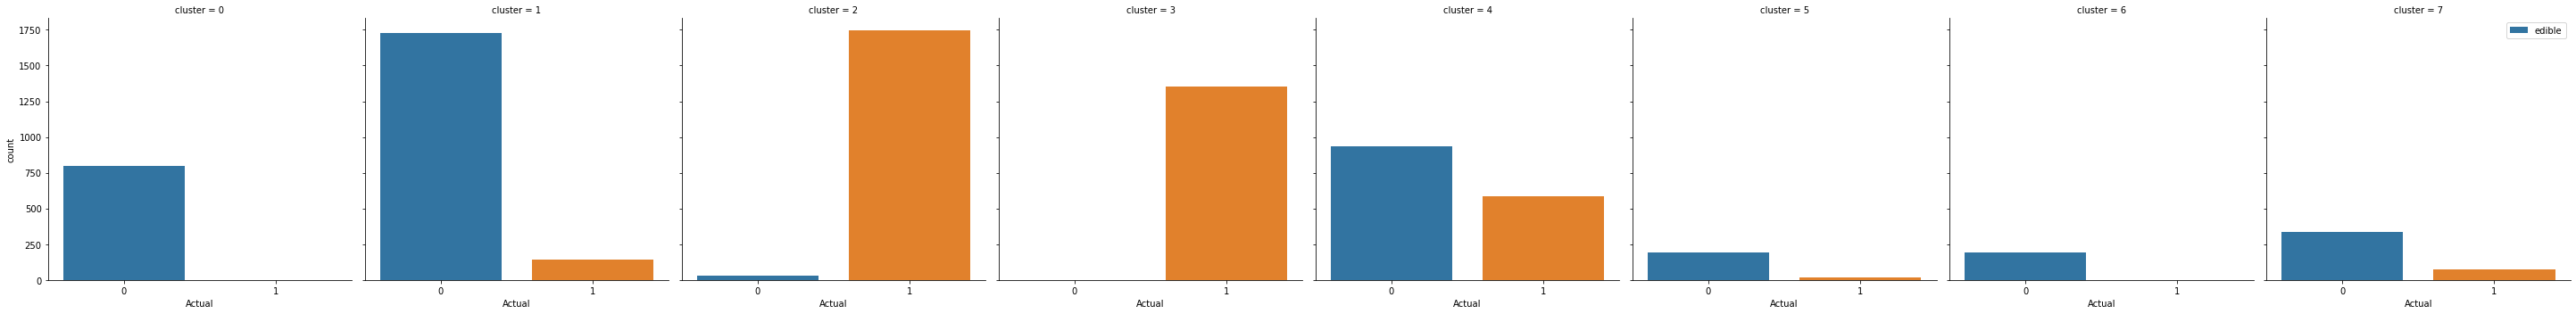

In [ ]:
# Plotting to see how the default K-means model has clustered the classes of mushroom
kmean_pred = KMeans()
kmean_pred.fit(mushroomX_scaled)
clusters = kmean_pred.predict(mushroomX_scaled)
cluster_result = pd.DataFrame()
cluster_result['cluster'] = clusters
cluster_result['Actual'] = mushroomy
sns.factorplot(col='cluster', x='Actual', data=cluster_result, kind='count')
plt.legend(labels=['edible'])
plt.show()

**Comments:** The first and fourth cluster is more homogenous with class (poisonous). Cluster 6 is clustered more with edible mushroom. Other clusters have mixture of both posionous and edible mushrooms

# **4. Parameter Optimization - Manual Tuning**

## 4.1 K-Means

In [ ]:
# Default model

kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
# Step 1 - Optimizing init parameter - Based on homogeneity score

init_opt = ['k-means++', 'random']

# Iterating the values of the parameter, fitting the model and getting the accuracy on IBM
print("On IBM")
for i in init_opt:
  model = KMeans(init = i)
  model.fit(IbmX_scaled)
  print("For init ", str(i))
  labels_pred = model.labels_
  labels_true = Ibmy
  homogeneity = homogeneity_score(labels_true, labels_pred)
  print("homogeneity: ", homogeneity)

print(100*'-')
# Iterating the values of the parameter, fitting the model and getting the accuracy on Mushroom
print("On Mushroom")
for i in init_opt:
  model = KMeans(init = i)
  model.fit(mushroomX_scaled)
  print("For init ", str(i))
  labels_pred = model.labels_
  labels_true = mushroomy
  homogeneity = homogeneity_score(labels_true, labels_pred)
  print("homogeneity: ", homogeneity)  

On IBM
For init  k-means++
homogeneity:  0.06914163617091286
For init  random
homogeneity:  0.06848476290922627
----------------------------------------------------------------------------------------------------
On Mushroom
For init  k-means++
homogeneity:  0.6623492301576244
For init  random
homogeneity:  0.6182852491442673


**Comments:** The best value for init parameter

On IBM: init = random

On Mushroom: init = k-means++

In [ ]:
# Step 2 - Optimizing n_init - Based on homogeneity

# On IBM Data
print("On IBM")
for i in range(1, 15):
  model = KMeans(n_init = i, random_state = 100)
  model.fit(IbmX_scaled)
  print("For n_init: ", str(i))
  labels_pred = model.labels_
  labels_true = Ibmy
  homogeneity = homogeneity_score(labels_true, labels_pred)
  print("homogeneity: ", homogeneity) 

# On Mushroom Data
print("On Mushroom")
for i in range(1, 15):
  model = KMeans(n_init = i, random_state = 100)
  model.fit(mushroomX_scaled)
  print("For n_init: ", str(i))
  labels_pred = model.labels_
  labels_true = mushroomy
  homogeneity = homogeneity_score(labels_true, labels_pred)
  print("homogeneity: ", homogeneity) 

On IBM
For n_init:  1
homogeneity:  0.07124913299805084
For n_init:  2
homogeneity:  0.06491827907958966
For n_init:  3
homogeneity:  0.06491827907958966
For n_init:  4
homogeneity:  0.06491827907958966
For n_init:  5
homogeneity:  0.06491827907958966
For n_init:  6
homogeneity:  0.06491827907958966
For n_init:  7
homogeneity:  0.06491827907958966
For n_init:  8
homogeneity:  0.06491827907958966
For n_init:  9
homogeneity:  0.06491827907958966
For n_init:  10
homogeneity:  0.06491827907958966
For n_init:  11
homogeneity:  0.06491827907958966
For n_init:  12
homogeneity:  0.06491827907958966
For n_init:  13
homogeneity:  0.06491827907958966
For n_init:  14
homogeneity:  0.06491827907958966
On Mushroom
For n_init:  1
homogeneity:  0.737442565341787
For n_init:  2
homogeneity:  0.737442565341787
For n_init:  3
homogeneity:  0.6647722112960464
For n_init:  4
homogeneity:  0.6647722112960464
For n_init:  5
homogeneity:  0.6679576401106303
For n_init:  6
homogeneity:  0.6679576401106303
For 

**Comments:** Optimum n_init parameter:

On IBM: n_init = 1

On Mushroom: n_init = 2

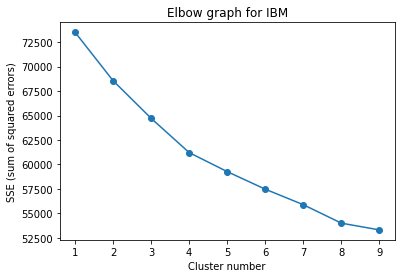

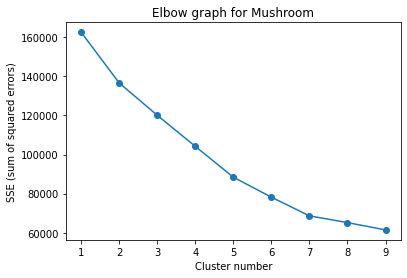

In [ ]:
# Step 3 - Elbow Method to determine the optimum n_clusters

SSE = [] #sum of squared error
for i in range (1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 1)
    kmeans.fit(IbmX_scaled)
    SSE.append(kmeans.inertia_) #inertia: sum of distances of samples to their closest cluster center
    
plt.plot(range(1, 10), SSE, 'o-')
plt.title('Elbow graph for IBM')
plt.xlabel('Cluster number')
plt.ylabel('SSE (sum of squared errors)')
plt.show()  

print()

SSE = [] #sum of squared error
for i in range (1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 1)
    kmeans.fit(mushroomX_scaled)
    SSE.append(kmeans.inertia_) #inertia: sum of distances of samples to their closest cluster center
    
plt.plot(range(1, 10), SSE, 'o-')
plt.title('Elbow graph for Mushroom')
plt.xlabel('Cluster number')
plt.ylabel('SSE (sum of squared errors)')
plt.show()  

**Comments:** The local or global optima is not reached in both the graphs, as we see the Error keeps decreasing as the number of clusters increases. Considering only 2 labels on both the datasets, an optimum clusters of 8 is set

## 4.2 Birch

In [ ]:
# Default Model
birch

Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=3,
      threshold=0.5)

In [ ]:
# Step 1 - Optimizing "threshold" - based on  homogeneity

threshold = np.logspace(-1.0, +1.5, 30)

#for i in threshold:

print("On IBM")
for i in threshold:
  model = Birch(threshold=i)
  model.fit(IbmX_scaled)
  labels_pred = model.labels_
  labels_true = Ibmy
  homogeneity = homogeneity_score(labels_true, labels_pred)
  print("For threshold %s Homogeneity = %.5f" % (str(i), homogeneity)) 

print(100*'-')

threshold = np.logspace(-2.0, +0.5, 30)
print("On Mushroom")
for i in threshold:
  model = Birch(threshold=i)
  model.fit(mushroomX_scaled)
  labels_pred = model.labels_
  labels_true = mushroomy
  homogeneity = homogeneity_score(labels_true, labels_pred)
  print("For threshold %s Homogeneity = %.5f" % (str(i), homogeneity)) 

On IBM
For threshold 0.1 Homogeneity = 0.01131
For threshold 0.12195704601594415 Homogeneity = 0.01131
For threshold 0.14873521072935114 Homogeneity = 0.01131
For threshold 0.18139306939110622 Homogeneity = 0.01131
For threshold 0.2212216291070449 Homogeneity = 0.01131
For threshold 0.26979536400730003 Homogeneity = 0.01131
For threshold 0.32903445623126687 Homogeneity = 0.01131
For threshold 0.4012807031942776 Homogeneity = 0.01131
For threshold 0.4893900918477494 Homogeneity = 0.01131
For threshold 0.5968456995122311 Homogeneity = 0.01131
For threshold 0.7278953843983151 Homogeneity = 0.01131
For threshold 0.8877197088985865 Homogeneity = 0.01131
For threshold 1.0826367338740546 Homogeneity = 0.01131
For threshold 1.3203517797162956 Homogeneity = 0.01131
For threshold 1.6102620275609392 Homogeneity = 0.01131
For threshold 1.9638280019297698 Homogeneity = 0.01131
For threshold 2.395026619987486 Homogeneity = 0.01131
For threshold 2.92090371703225 Homogeneity = 0.01147
For threshold 3.

**Comments:** Optimum values for "threshold":

On  IBM: threshold = 0.1

On Mushroom: threhold = 0.01

In [ ]:
# Step 2 - optimizing "n_clusters" parameter - based on homogeneity score

print("On IBM")
for i in range(1, 15, 1):
  model = Birch(n_clusters=i)
  model.fit(IbmX_scaled)
  labels_pred = model.labels_
  labels_true = Ibmy
  homogeneity = homogeneity_score(labels_true, labels_pred)
  print("For n_clusters %s Homogeneity = %.5f" % (str(i), homogeneity)) 

print(100*'-')
print("On Mushroom")
for i in range(1, 15, 1):
  model = Birch(n_clusters=i)
  model.fit(mushroomX_scaled)
  labels_pred = model.labels_
  labels_true = mushroomy
  homogeneity = homogeneity_score(labels_true, labels_pred)
  print("For n_clusters %s Homogeneity = %.5f" % (str(i), homogeneity)) 

On IBM
For n_clusters 1 Homogeneity = -0.00000
For n_clusters 2 Homogeneity = 0.01128
For n_clusters 3 Homogeneity = 0.01131
For n_clusters 4 Homogeneity = 0.02732
For n_clusters 5 Homogeneity = 0.04674
For n_clusters 6 Homogeneity = 0.06045
For n_clusters 7 Homogeneity = 0.06112
For n_clusters 8 Homogeneity = 0.06201
For n_clusters 9 Homogeneity = 0.06203
For n_clusters 10 Homogeneity = 0.06283
For n_clusters 11 Homogeneity = 0.06348
For n_clusters 12 Homogeneity = 0.07037
For n_clusters 13 Homogeneity = 0.07105
For n_clusters 14 Homogeneity = 0.07566
----------------------------------------------------------------------------------------------------
On Mushroom
For n_clusters 1 Homogeneity = 0.00000
For n_clusters 2 Homogeneity = 0.26965
For n_clusters 3 Homogeneity = 0.28421
For n_clusters 4 Homogeneity = 0.30057
For n_clusters 5 Homogeneity = 0.55317
For n_clusters 6 Homogeneity = 0.58575
For n_clusters 7 Homogeneity = 0.60560
For n_clusters 8 Homogeneity = 0.61477
For n_clusters 9

**Comments:** Optimum value for n_clusters:

On IBM: n_clusters = 8 (The homogeneity could improve even with more clusters than 14)

On Mushroom: n_clusters = 8 (The homogeneity could improve even with more clusters than 14)

## 4.3 K-Modes

In [ ]:
# default model

kmodes

KModes(cat_dissim=<function matching_dissim at 0x7ff1a5931268>, init='Cao',
       max_iter=100, n_clusters=8, n_init=1, n_jobs=1, random_state=None,
       verbose=0)

In [ ]:
# Step 1 - Optimizing "init" parameter based on Homogeneity

init_opt = ['Huang', 'Cao', 'random']

print("On IBM")
for i in init_opt:
  model = KModes(init=i)
  model.fit(IbmX_scaled)
  labels_pred = model.labels_
  labels_true = Ibmy
  homogeneity = homogeneity_score(labels_true, labels_pred)
  print("For init: %s, Homogeneity = %.5f" % (str(i), homogeneity)) 

print("On Mushroom")
for i in init_opt:
  model = KModes(init=i)
  model.fit(mushroomX_scaled)
  labels_pred = model.labels_
  labels_true = mushroomy
  homogeneity = homogeneity_score(labels_true, labels_pred)
  print("For init: %s, Homogeneity = %.5f" % (str(i), homogeneity))

On IBM
For init: Huang, Homogeneity = 0.05427
For init: Cao, Homogeneity = 0.05171
For init: random, Homogeneity = 0.04798
On Mushroom
For init: Huang, Homogeneity = 0.59222
For init: Cao, Homogeneity = 0.61834
For init: random, Homogeneity = 0.57177


**Comments:** The best value for init parameter

On IBM: init = Huang

On Mushroom: init = Cao

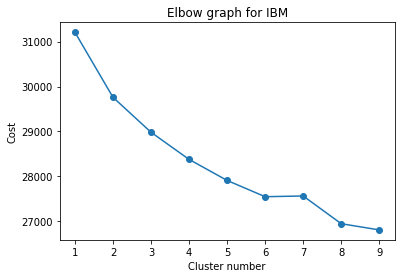

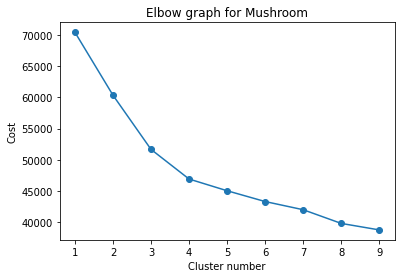

In [ ]:
# Step 2 - Optimised n_clusters by comparing cost for each K

cost = []
for i in list(range(1,10)):
    kmode = KModes(n_clusters = i, init = "Huang")
    kmode.fit_predict(IbmX_scaled)
    cost.append(kmode.cost_)
    
plt.plot(range(1,10,1), cost, 'o-')
plt.title('Elbow graph for IBM')
plt.xlabel('Cluster number')
plt.ylabel('Cost')
plt.show()

print()

cost = []
for i in list(range(1,10)):
    kmode = KModes(n_clusters = i, init = "Cao")
    kmode.fit_predict(mushroomX_scaled)
    cost.append(kmode.cost_)
    
plt.plot(range(1,10,1), cost, 'o-')
plt.title('Elbow graph for Mushroom')
plt.xlabel('Cluster number')
plt.ylabel('Cost')
plt.show() 

**Comment:** There is no clear elbow for both data sets, rather there are fairly smooth curves. Considering only 2 labels on both the data sets, an optimum clusters of 8 is set.

## 4.4 Hierarchical Agglomerative Clustering

In [ ]:
# default model
hac

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

On IBM


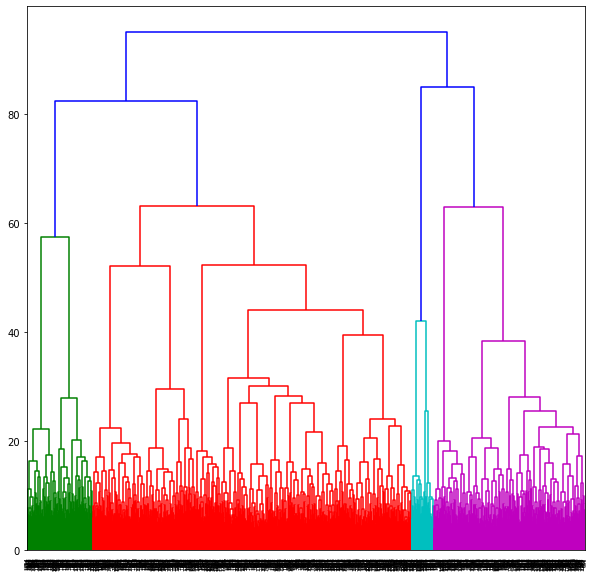

----------------------------------------------------------------------------------------------------
On MUSHROOM


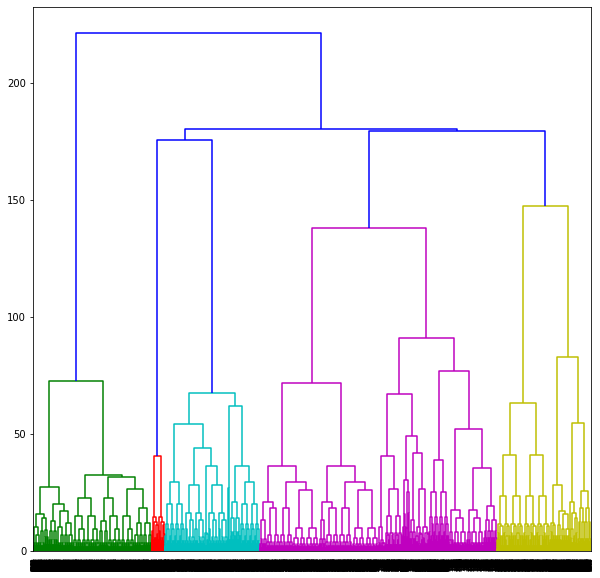

In [ ]:
# Create Dendrogram for Visualization

from scipy.cluster.hierarchy import dendrogram, linkage

print("On IBM")
plt.figure(figsize=(10, 10))
ibm_den = dendrogram(linkage(IbmX_scaled, 'ward'))
plt.show()

print(100*'-')
print("On Mushroom")
plt.figure(figsize=(10, 10))
mushroom_den = dendrogram(linkage(mushroomX_scaled, 'ward'))
plt.show()

In [ ]:
# Step 1 - optimizing "linkage" parameter based on Homogeneity

linkage_opt = ['ward', 'complete', 'average', 'single']

print("On IBM")
for i in linkage_opt:
  model = AgglomerativeClustering(linkage=i)
  model.fit(IbmX_scaled)
  labels_pred = model.labels_
  labels_true = Ibmy
  homogeneity = homogeneity_score(labels_true, labels_pred)
  print("For linkage: %s, Homogeneity = %.5f" % (str(i), homogeneity)) 

print("On Mushroom")
for i in linkage_opt:
  model = AgglomerativeClustering(linkage=i)
  model.fit(mushroomX_scaled)
  labels_pred = model.labels_
  labels_true = mushroomy
  homogeneity = homogeneity_score(labels_true, labels_pred)
  print("For linkage: %s, Homogeneity = %.5f" % (str(i), homogeneity)) 

On IBM
For linkage: ward, Homogeneity = 0.01128
For linkage: complete, Homogeneity = 0.00067
For linkage: average, Homogeneity = 0.00163
For linkage: single, Homogeneity = 0.00163
On Mushroom
For linkage: ward, Homogeneity = 0.26965
For linkage: complete, Homogeneity = 0.00969
For linkage: average, Homogeneity = 0.02283
For linkage: single, Homogeneity = 0.02283


**Comments:** On both data, the defautl value "ward" performs well

In [ ]:
# Step 2 - optimizing "n_clusters" parameter - based on homogeneity score

print("On IBM")
for i in range(1, 15, 1):
  model = AgglomerativeClustering(n_clusters=i)
  model.fit(IbmX_scaled)
  labels_pred = model.labels_
  labels_true = Ibmy
  homogeneity = homogeneity_score(labels_true, labels_pred)
  print("For n_clusters %s Homogeneity = %.5f" % (str(i), homogeneity)) 

print(100*'-')
print("On Mushroom")
for i in range(1, 15, 1):
  model = AgglomerativeClustering(n_clusters=i)
  model.fit(mushroomX_scaled)
  labels_pred = model.labels_
  labels_true = mushroomy
  homogeneity = homogeneity_score(labels_true, labels_pred)
  print("For n_clusters %s Homogeneity = %.5f" % (str(i), homogeneity)) 

On IBM
For n_clusters 1 Homogeneity = -0.00000
For n_clusters 2 Homogeneity = 0.01128
For n_clusters 3 Homogeneity = 0.01131
For n_clusters 4 Homogeneity = 0.02732
For n_clusters 5 Homogeneity = 0.04674
For n_clusters 6 Homogeneity = 0.06045
For n_clusters 7 Homogeneity = 0.06112
For n_clusters 8 Homogeneity = 0.06201
For n_clusters 9 Homogeneity = 0.06203
For n_clusters 10 Homogeneity = 0.06283
For n_clusters 11 Homogeneity = 0.06348
For n_clusters 12 Homogeneity = 0.07037
For n_clusters 13 Homogeneity = 0.07105
For n_clusters 14 Homogeneity = 0.07566
----------------------------------------------------------------------------------------------------
On Mushroom
For n_clusters 1 Homogeneity = 0.00000
For n_clusters 2 Homogeneity = 0.26965
For n_clusters 3 Homogeneity = 0.47973
For n_clusters 4 Homogeneity = 0.50153
For n_clusters 5 Homogeneity = 0.58390
For n_clusters 6 Homogeneity = 0.59490
For n_clusters 7 Homogeneity = 0.71225
For n_clusters 8 Homogeneity = 0.73500
For n_clusters 9

**Comments:** In both the datasets, the homogeneity increases as the n_clusters increases. Taking an optimum of n_clusters = 8

# **5. Evaluation and Comparison of Manually Tuned Models**

In [ ]:
# Calling models for the optimum parameter values on IBM Dataset and storing the models to the variables in the function

data = ''

if data == "IBM":
  kmeans = KMeans(n_clusters = 8, n_init = 1,init = 'random' )
  birch = Birch(threshold = 0.1, n_clusters = 8)
  kmodes = KModes(init = 'Huang', n_clusters = 8)
  hac = AgglomerativeClustering(n_clusters = 8)
else:
  kmeans = KMeans(n_clusters = 8, n_init = 2)
  birch = Birch(threshold=0.01, n_clusters = 8)
  kmodes = KModes(init = 'Cao', n_clusters = 8)
  hac = AgglomerativeClustering(n_clusters = 8)

data = "IBM"
metrics(IbmX, Ibmy, "IBM")

data == "Mushroom"
metrics(mushroomX, mushroomy, "Mushroom")

--------------------------------------------------
	Performance Metrics on IBM data
--------------------------------------------------
K-Means algorithm 

Adjusted Rand Index Score: 0.00056
Homogeneity Score: 0.00472
Completeness Score: 0.00101
V Measure Score: 0.00166
--------------------------------------------------
Birch algorithm 

Adjusted Rand Index Score: 0.00118
Homogeneity Score: 0.00658
Completeness Score: 0.00142
V Measure Score: 0.00233
--------------------------------------------------
K-Modes algorithm 

Adjusted Rand Index Score: -0.00052
Homogeneity Score: 0.05171
Completeness Score: 0.01150
V Measure Score: 0.01881
--------------------------------------------------
HAC algorithm 

Adjusted Rand Index Score: 0.00118
Homogeneity Score: 0.00658
Completeness Score: 0.00142
V Measure Score: 0.00233
--------------------------------------------------
--------------------------------------------------
	Performance Metrics on Mushroom data
-------------------------------------

# **6. PCA**

In [ ]:
# Importing PCA for Dimensionality Reduction

from sklearn.decomposition import PCA

# PCA to reduce the dimensions
reduced_IBM = PCA(n_components=8).fit_transform(IbmX_scaled) 
reduced_mushroom = PCA(n_components=8).fit_transform(mushroomX_scaled) 


# **7. Evaluation and Comparison of models after PCA**

In [ ]:
data = ''

if data == "IBM":
  kmeans = KMeans(n_clusters = 8, n_init = 1,init = 'random' )
  birch = Birch(threshold = 0.1, n_clusters = 8)
  kmodes = KModes(init = 'Huang', n_clusters = 8)
  hac = AgglomerativeClustering(n_clusters = 8)
else:
  kmeans = KMeans(n_clusters = 8, n_init = 2)
  birch = Birch(threshold=0.01, n_clusters = 8)
  kmodes = KModes(init = 'Cao', n_clusters = 8)
  hac = AgglomerativeClustering(n_clusters = 8)

data = "IBM"
metrics(reduced_IBM, Ibmy, "IBM")

data == "Mushroom"
metrics(reduced_mushroom, mushroomy, "Mushroom")

--------------------------------------------------
	Performance Metrics on IBM data
--------------------------------------------------
K-Means algorithm 

Adjusted Rand Index Score: 0.00833
Homogeneity Score: 0.05748
Completeness Score: 0.01285
V Measure Score: 0.02100
--------------------------------------------------
Birch algorithm 

Adjusted Rand Index Score: 0.01820
Homogeneity Score: 0.08350
Completeness Score: 0.01917
V Measure Score: 0.03118
--------------------------------------------------
K-Modes algorithm 

Adjusted Rand Index Score: -0.00086
Homogeneity Score: 0.00444
Completeness Score: 0.04962
V Measure Score: 0.00814
--------------------------------------------------
HAC algorithm 

Adjusted Rand Index Score: 0.01820
Homogeneity Score: 0.08350
Completeness Score: 0.01917
V Measure Score: 0.03118
--------------------------------------------------
--------------------------------------------------
	Performance Metrics on Mushroom data
-------------------------------------

# **8. Proposing the best and worst performing algorithms on both the datasets**


---


**ON IBM**

*Best: Birch, HAC*

Birch and HAC both give ARI and V-measure of 0.01820 and 0.03118 which are very low, but still the highest amongst all algorithms. Overall, Birch and HAC do not perform that well in IBM, but compare to K-Means and K-Modes, we can conclude that they are best performing clustering algorithm for IBM.

*Worst: K-Modes*

K-Modes gives ARI and V-measure score of -0.00086 and 0.00814, hence, this makes it the worst performing clustering algorithm for IBM.

---


**ON MUSHROOM**

*Best: Birch, HAC*

Birch and HAC both give ARI and V-measure of 0.25839 and 0.38207 which still considerd low, but it is the highest amongst all algorithms. Overall, Birch and HAC do not perform that well in Mushroom, but compare to K-Means and K-Modes, we can conclude that they are best performing clustering algorithm for Mushroom.

*Worst: K-Modes*

K-Modes gives ARI and V-measure score of -0.00008 and 0.00164, hence, this makes it the worst performing clustering algorithm for Mushroom.

---

**ACROSS IBM AND MUSHROOM**

Overall, clustering algorithm does not perform well on IBM or Mushroom data set like they do in classification algorithm. Since both data sets already have labelled dependent variables, it is best to choose classification method rather than clustering method.



---